### Required Packages

In [1]:
import utils
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.svm import SVC,SVR

random.seed(0)
style.use('ggplot')
warnings.filterwarnings('ignore')

### Define Data

In [2]:
data = pd.read_csv('Datasets/linear.csv')

### Split Data Into features and label

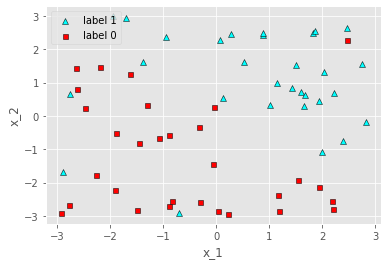

In [3]:
features = np.array(data[['x_1', 'x_2']])
labels = np.array(data['y'])
utils.plot_points(features, labels)

In [4]:
features.hist(figsize=(36,15))
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

### Split Data To Train and Test Data

In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

### SVM 

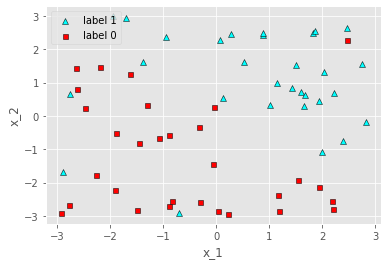

In [8]:
utils.plot_points(features, labels)

Accuracy: 93.333%


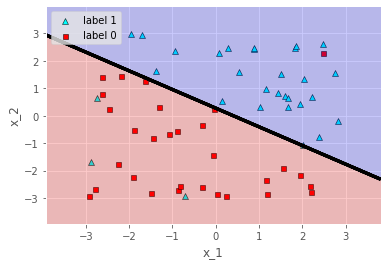

In [11]:
svm_linear = SVC(kernel='linear')

svm_linear.fit(features, labels)

print("Accuracy: {:.3f}%".format(svm_linear.score(features, labels)*100))

utils.plot_model(features, labels, svm_linear)

C = 0.01
Accuracy: 86.667%


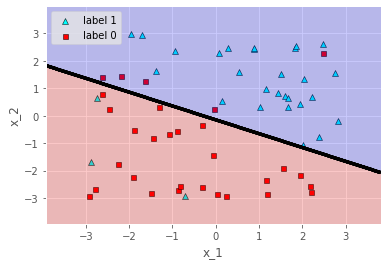

In [12]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(features, labels)
print("C = 0.01")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

C = 10
Accuracy: 91.667%


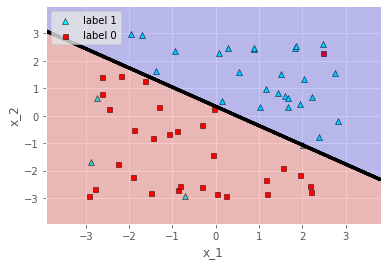

In [13]:
svm = SVC(kernel='linear', C=10)
svm.fit(features, labels)
print("C = 10")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

C = 100
Accuracy: 91.667%


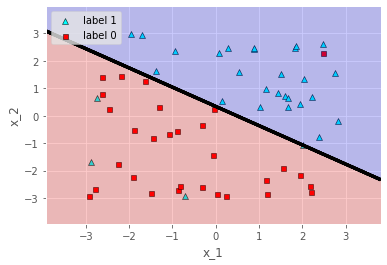

In [14]:
svm = SVC(kernel='linear', C=100)
svm.fit(features, labels)
print("C = 100")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

C = 50
Accuracy: 91.667%


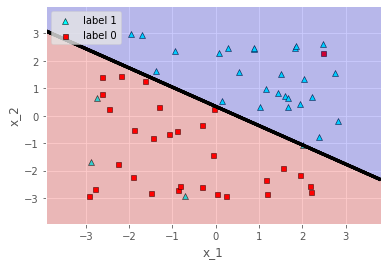

In [15]:
svm = SVC(kernel='linear', C=50)
svm.fit(features, labels)
print("C = 50")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

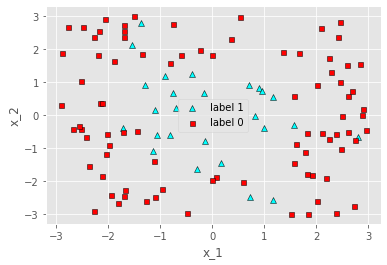

In [16]:
data = pd.read_csv('Datasets/one_circle.csv')

features = np.array(data[['x_1', 'x_2']])
labels = np.array(data['y'])

utils.plot_points(features, labels)

Polynomial kernel of degree = 2
Accuracy: 89.091%


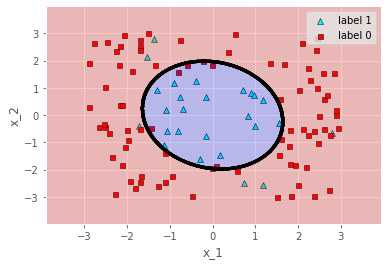

In [18]:
svm = SVC(kernel='poly', degree=2)
svm.fit(features, labels)
print("Polynomial kernel of degree = 2")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

Polynomial kernel of degree = 4
Accuracy: 90.000%


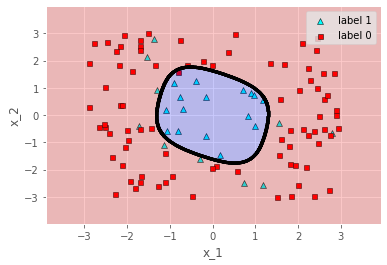

In [20]:
svm = SVC(kernel='poly', degree=4)
svm.fit(features, labels)
print("Polynomial kernel of degree = 4")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

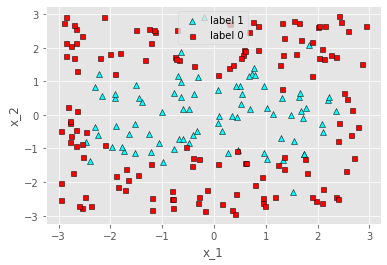

In [21]:
data = pd.read_csv('Datasets/two_circles.csv')

features = np.array(data[['x_1', 'x_2']])
labels = np.array(data['y'])

utils.plot_points(features, labels)

Gamma = 0.1
Accuracy: 87.727%


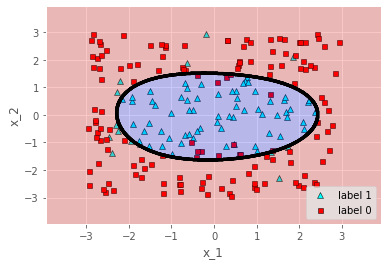

In [23]:
svm = SVC(kernel='rbf', gamma=0.1)
svm.fit(features, labels)

print("Gamma = 0.1")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

Gamma = 1
Accuracy: 90.455%


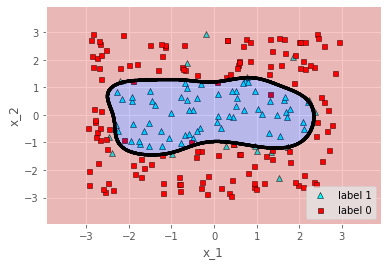

In [24]:
svm = SVC(kernel='rbf', gamma=1)
svm.fit(features, labels)

print("Gamma = 1")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

Gamma = 18
Accuracy: 98.182%


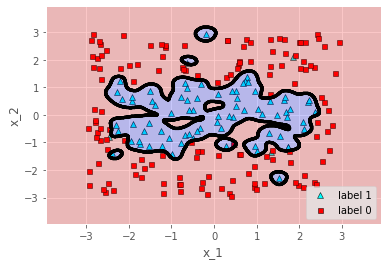

In [25]:
svm = SVC(kernel='rbf', gamma=18)
svm.fit(features, labels)

print("Gamma = 18")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

Gamma = 100
Accuracy: 99.091%


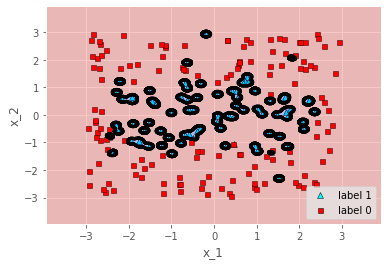

In [26]:
svm = SVC(kernel='rbf', gamma=100)
svm.fit(features, labels)

print("Gamma = 100")
print("Accuracy: {:.3f}%".format(svm.score(features, labels)*100))
utils.plot_model(features, labels, svm)

### SVR

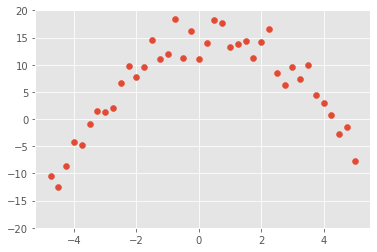

In [27]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)

draw_polynomial(coefs)
X = []
Y = []
x=-5
for i in range(40):
    x = x+0.25
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
plt.ylim(-20,20)
plt.scatter(X, Y)

In [28]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
svr.fit(X.reshape(-1,1), Y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

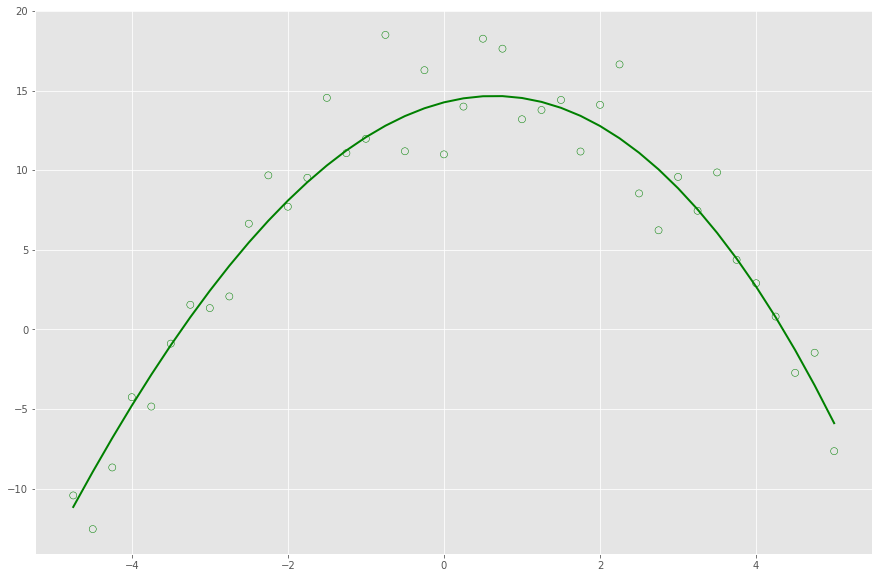

In [29]:
from sklearn.metrics import mean_squared_error


def display_results(svr, X, Y):
    X = np.array(X)
    y = np.array(Y)
    lw = 2

    svrs = ['svr_poly']
    kernel_label = ['Polynomial']
    model_color = ['g']

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
    for ix, _ in enumerate(svrs):
        plt.plot(X, svr.predict(X.reshape(-1, 1)), color=model_color[ix], lw=lw,
                label='{} model'.format(kernel_label[ix]))
        plt.scatter(X[svr.support_], y[svr.support_], facecolor="none",
                    edgecolor=model_color[ix], s=50,
                    label='{} support vectors'.format(kernel_label[ix]))
        plt.scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                    y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                    facecolor="none", edgecolor="k", s=50,
                    label='other training data')


display_results(svr, X, Y)


### Social Network Ads Dataset

In [34]:
data = pd.read_csv('Datasets/Social_Network_Ads.csv')

In [35]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test,y_pred)*100

[[57  6]
 [ 1 36]]


93.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


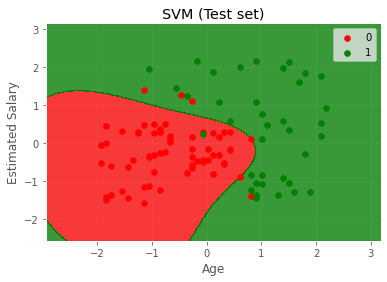

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()